# Pandas
Popular comparission with STATA, SAS courtesy of Stack Overflow Trends

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import request


ModuleNotFoundError: No module named 'request'

In [12]:
series_obj1 = pd.Series(np.random.randn(4), name = 'daily return')
series_obj1

0    0.911993
1    0.532788
2   -0.450333
3   -1.010001
Name: daily return, dtype: float64

In [13]:
series_obj1*100

0     91.199318
1     53.278774
2    -45.033271
3   -101.000125
Name: daily return, dtype: float64

In [14]:
np.abs(series_obj1)

0    0.911993
1    0.532788
2    0.450333
3    1.010001
Name: daily return, dtype: float64

In [15]:
series_obj1.describe()

count    4.000000
mean    -0.003888
std      0.882881
min     -1.010001
25%     -0.590250
50%      0.041228
75%      0.627589
max      0.911993
Name: daily return, dtype: float64

In [18]:
series_obj1.index = ['AMZN', 'AAPL', 'MSFT','GOOG']
series_obj1

AMZN    0.911993
AAPL    0.532788
MSFT   -0.450333
GOOG   -1.010001
Name: daily return, dtype: float64

In [19]:
'AAPL' in series_obj1  # return boolean value

True

# DataFrames

In [22]:
# getting data from github repository
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [23]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [25]:
df[['country','tcgdp']] # retriving all rows for columns county and tcgdp

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [26]:
# retriving data with index location iloc [row, columns]
df.iloc[2:5,0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [31]:
# retriving data with mixture of integer and columns name using loc
df.loc[df.index[0:5],['country','year']]

,country,year
0,Argentina,2000
1,Australia,2000
2,India,2000
3,Israel,2000
4,Malawi,2000


# striping down the data

In [42]:
df = df[['country','POP','tcgdp']]   #striping data and storing in df1
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [43]:
# set country as index for df1
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [44]:
df.columns = 'Population','total GDP' # rename to better naming

In [45]:
df

,Population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [50]:
df['Population']= df['Population']*1e3  #population is in thousands lets revert to single unit
df

# think this is scientific notation used for numbers
# 1000 = 10^3 = 1 * 10^3 = 1 e3
# other:
# 100 == 1e2
# 300 == 3e2
#5000 == 5e3


,Population,total GDP
country,,
Argentina,3.733565e+13,2.950722e+05
Australia,1.905319e+13,5.418047e+05
India,1.006300e+15,1.728144e+06
Israel,6.114570e+12,1.292539e+05
Malawi,1.180150e+13,5.026222e+03
South Africa,4.506410e+13,2.272424e+05
United States,2.821720e+14,9.898700e+06
Uruguay,3.219793e+12,2.525596e+04


In [56]:
# Adding a new Column GDP percapita, multiplying with 1,000,000 we get Total GDP in millions
df['GDP percap'] = df['total GDP'] * 1e6 / df['Population']
df


,Population,total GDP,GDP Percapita,GDP percap
country,,,,
Argentina,3.733565e+13,2.950722e+05,0.007903,0.007903
Australia,1.905319e+13,5.418047e+05,0.028436,0.028436
India,1.006300e+15,1.728144e+06,0.001717,0.001717
Israel,6.114570e+12,1.292539e+05,0.021139,0.021139
Malawi,1.180150e+13,5.026222e+03,0.000426,0.000426
South Africa,4.506410e+13,2.272424e+05,0.005043,0.005043
United States,2.821720e+14,9.898700e+06,0.035080,0.035080
Uruguay,3.219793e+12,2.525596e+04,0.007844,0.007844


In [62]:
#df.drop(['B', 'C'], axis=1)
#df.drop(['GDP Percapita','GDP Percap'])
df
df.drop(['GDP Percapita'],axis=1)

,Population,total GDP,GDP percap
country,,,
Argentina,3.733565e+13,2.950722e+05,0.007903
Australia,1.905319e+13,5.418047e+05,0.028436
India,1.006300e+15,1.728144e+06,0.001717
Israel,6.114570e+12,1.292539e+05,0.021139
Malawi,1.180150e+13,5.026222e+03,0.000426
South Africa,4.506410e+13,2.272424e+05,0.005043
United States,2.821720e+14,9.898700e+06,0.035080
Uruguay,3.219793e+12,2.525596e+04,0.007844


In [63]:
df


,Population,total GDP,GDP Percapita,GDP percap
country,,,,
Argentina,3.733565e+13,2.950722e+05,0.007903,0.007903
Australia,1.905319e+13,5.418047e+05,0.028436,0.028436
India,1.006300e+15,1.728144e+06,0.001717,0.001717
Israel,6.114570e+12,1.292539e+05,0.021139,0.021139
Malawi,1.180150e+13,5.026222e+03,0.000426,0.000426
South Africa,4.506410e+13,2.272424e+05,0.005043,0.005043
United States,2.821720e+14,9.898700e+06,0.035080,0.035080
Uruguay,3.219793e+12,2.525596e+04,0.007844,0.007844


In [65]:
df=df.drop(['GDP Percapita','GDP percap'],axis=1)
df

,Population,total GDP
country,,
Argentina,3.733565e+13,2.950722e+05
Australia,1.905319e+13,5.418047e+05
India,1.006300e+15,1.728144e+06
Israel,6.114570e+12,1.292539e+05
Malawi,1.180150e+13,5.026222e+03
South Africa,4.506410e+13,2.272424e+05
United States,2.821720e+14,9.898700e+06
Uruguay,3.219793e+12,2.525596e+04


In [66]:
# Adding a new Column GDP percapita, multiplying with 1,000,000 we get Total GDP in millions
df['GDP percap'] = df['total GDP'] * 1e6 / df['Population']
df


,Population,total GDP,GDP percap
country,,,
Argentina,3.733565e+13,2.950722e+05,0.007903
Australia,1.905319e+13,5.418047e+05,0.028436
India,1.006300e+15,1.728144e+06,0.001717
Israel,6.114570e+12,1.292539e+05,0.021139
Malawi,1.180150e+13,5.026222e+03,0.000426
South Africa,4.506410e+13,2.272424e+05,0.005043
United States,2.821720e+14,9.898700e+06,0.035080
Uruguay,3.219793e+12,2.525596e+04,0.007844


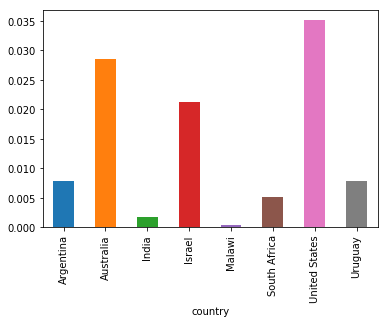

In [67]:
# pandas series and dataframe good method of ploting using Matplotlib work with Pandas
df['GDP percap'].plot(kind='bar')
plt.show()

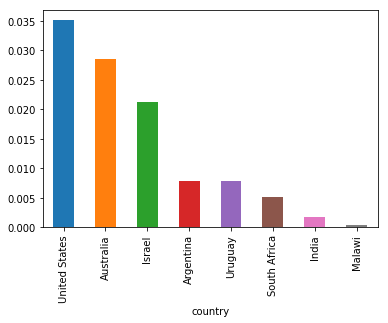

In [69]:
#sorking data and ploting
df = df.sort_values(by='GDP percap', ascending=False)
df
df['GDP percap'].plot(kind='bar')
plt.show()

# Accessing data with request

In [7]:
import requests
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split('\n')

source[0]
#https://lectures.quantecon.org/py/pandas.html#Exercises

'DATE,VALUE\r'

In [8]:
source[2]

'1948-02-01,3.8\r'

In [10]:
#pandas detech date columns, allowing some data filter
data = pd.read_csv(url,index_col=0,parse_dates=True) #detech data columns automatically, and making column 0 as index

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.head()  # retriving first 5 rows of data

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [14]:
#display.precision sets the output display precision in terms of decimal places. This is only a suggestion
pd.set_option('precision', 2)
data.describe()  # Your output might differ slightly

,VALUE
count,860.00
mean,5.74
std,1.64
min,2.50
25%,4.50
50%,5.60
75%,6.80
max,10.80


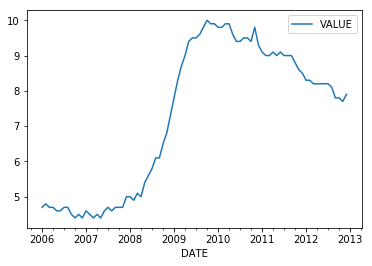

In [15]:
#We can also plot the unemployment rate from 2006 to 2012 as follows
data['2006':'2012'].plot()
plt.show()

# Accessing World Bank Data
Let’s look at one more example of downloading and manipulating data — this time from the World Bank.

The World Bank collects and organizes data on a huge range of indicators.

For example, here’s some data on government debt as a ratio to GDP.

If you click on “DOWNLOAD DATA” you will be given the option to download the data as an Excel file.

The next program does this for you, reads an Excel file into a pandas DataFrame, and plots time series for the US and Australia

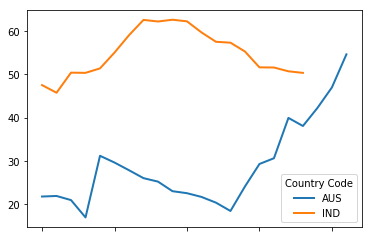

In [18]:
# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)

# == Parse data into a DataFrame == #
govt_debt = pd.read_excel('gd.xls', sheet_name='Data', skiprows=3, index_col=1)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'IND']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()
#https://lectures.quantecon.org/py/pandas.html#Exercises